Q2. Apply the K-Means clustering algorithm to the MNIST dataset for image clustering.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from tensorflow.keras.datasets import mnist

In [18]:
# load the mnist data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [20]:
#normalize pixel values 
train_images = train_images/255.0
test_images = test_images/255.0

#flatten the images for kmeans algo
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

In [21]:
print("Training data shape: ", train_images_flat.shape)
print("Testing data shape: ", test_images_flat.shape)

Training data shape:  (60000, 784)
Testing data shape:  (10000, 784)


In [22]:
num_clusters = 10

In [23]:
#apply k means clustering
kmeans = KMeans(n_clusters= num_clusters, random_state=42)
kmeans.fit(train_images_flat)

KMeans(n_clusters=10, random_state=42)

In [24]:
#predict clustr label
test_cluster_labels = kmeans.predict(test_images_flat)

In [25]:
print(test_cluster_labels)

[2 3 6 ... 2 7 8]


In [26]:
test_cluster_labels.shape

(10000,)

In [27]:
#compute the cluster centers
cluster_centers = kmeans.cluster_centers_

In [28]:
#for each test image, find the corredsponding cluster center
test_images_pred = cluster_centers[test_cluster_labels]

In [29]:
#calculate MSE between original and test images and their predicted cluster centre
mse = mean_squared_error(test_images_flat, test_images_pred)

print("Mean Squared Error: ", mse)

Mean Squared Error:  7.681231146334074e-07


In [32]:
cluster_images = cluster_centers.reshape(10, 28, 28)

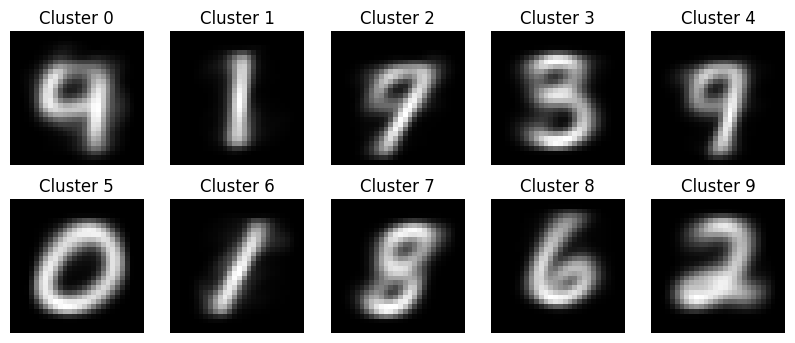

In [33]:
# Plot the cluster centers
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(cluster_images[i], cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.show()